# Mody, Devansh; Huang, YiDong; Alves de Oliveira, Thiago Eustaquio (2022), “A Curated Hate Speech Dataset”, Mendeley Data, V1, doi: 10.17632/9sxpkmm8xn.1

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("/content/dataset.csv")

In [3]:
data.head()

,Unnamed: 0,content,label
0,0,thank you very much sure you want to test the ...,0
1,1,i swear nobody actually cares about valentine ...,0
2,2,can someone lock in the new links that cia kee...,0
3,3,i did research thank you very much and it is n...,0
4,4,happy birthday chris evans a great actor and h...,0


<Axes: xlabel='label', ylabel='count'>

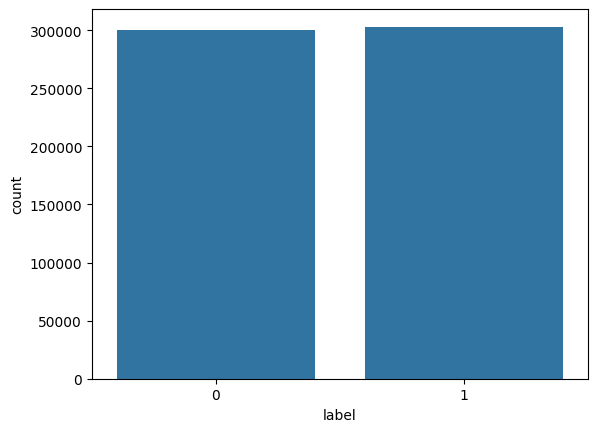

In [4]:
import seaborn as sns
sns.countplot(x='label', data=data)

## EDA

 - 0 ---> No hate
 - 1 ---> Hate

In [5]:
data.shape

(602931, 3)

In [6]:
data.isnull().sum()

,0
Unnamed: 0,0
content,0
label,0


In [7]:
# Let's check for the unique values in the dataset
data['label'].unique()

array([0, 1])

## Preprocessing

In [8]:
import re
import nltk
import string
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [9]:
# Let's apply stemming and stopwords on the data
stemmer = nltk.SnowballStemmer("english")
stopword = set(stopwords.words('english'))

In [10]:
x = data["content"]
y = data["label"]

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
# Let's split the data into train and test
x_train,x_test,y_train,y_test = train_test_split(x,y, random_state = 42)

print(len(x_train),len(y_train))
print(len(x_test),len(y_test))

452198 452198
150733 150733


## Feature engineering

In [13]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences

In [14]:
max_words = 20000
max_len = 310

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(x_train)

sequences = tokenizer.texts_to_sequences(x_train)
sequences_matrix = pad_sequences(sequences,maxlen=max_len)

In [15]:
sequences_matrix

array([[   0,    0,    0, ...,   96,  161, 2058],
       [   0,    0,    0, ...,  918,   94, 1220],
       [   0,    0,    0, ..., 1425,  195,  638],
       ...,
       [   0,    0,    0, ...,   13,  691, 1567],
       [   0,    0,    0, ..., 5119,    2, 4092],
       [   0,    0,    0, ..., 8170, 2578,   77]], dtype=int32)

In [16]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding, SpatialDropout1D
from keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [17]:
# Creating model architecture.
model = Sequential()
model.add(Embedding(max_words,100,input_length=max_len))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100,dropout=0.2,recurrent_dropout=0.2))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

model.build(input_shape=(None, max_len))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 310, 100)            │       2,000,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ spatial_dropout1d (SpatialDropout1D) │ (None, 310, 100)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 100)                 │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,080,501 (7.94 MB)

 Trainable params: 2,080,501 (7.94 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
# starting model training
history = model.fit(sequences_matrix,y_train,batch_size=256,epochs = 10,validation_split=0.15,callbacks=[early_stop])

Epoch 1/10
1502/1502 ━━━━━━━━━━━━━━━━━━━━ 830s 548ms/step - accuracy: 0.7441 - loss: 0.5042 - val_accuracy: 0.8266 - val_loss: 0.3827
Epoch 2/10
1502/1502 ━━━━━━━━━━━━━━━━━━━━ 851s 544ms/step - accuracy: 0.8336 - loss: 0.3764 - val_accuracy: 0.8353 - val_loss: 0.3671
Epoch 3/10
1502/1502 ━━━━━━━━━━━━━━━━━━━━ 865s 546ms/step - accuracy: 0.8441 - loss: 0.3530 - val_accuracy: 0.8433 - val_loss: 0.3507
Epoch 4/10
1502/1502 ━━━━━━━━━━━━━━━━━━━━ 862s 546ms/step - accuracy: 0.8516 - loss: 0.3358 - val_accuracy: 0.8453 - val_loss: 0.3473
Epoch 5/10
1502/1502 ━━━━━━━━━━━━━━━━━━━━ 862s 546ms/step - accuracy: 0.8572 - loss: 0.3236 - val_accuracy: 0.8499 - val_loss: 0.3370
Epoch 6/10
1502/1502 ━━━━━━━━━━━━━━━━━━━━ 865s 548ms/step - accuracy: 0.8637 - loss: 0.3110 - val_accuracy: 0.8545 - val_loss: 0.3287
Epoch 7/10
1502/1502 ━━━━━━━━━━━━━━━━━━━━ 857s 545ms/step - accuracy: 0.8693 - loss: 0.3004 - val_accuracy: 0.8561 - val_loss: 0.3266
Epoch 8/10
1502/1502 ━━━━━━━━━━━━━━━━━━━━ 821s 547ms/step - ac

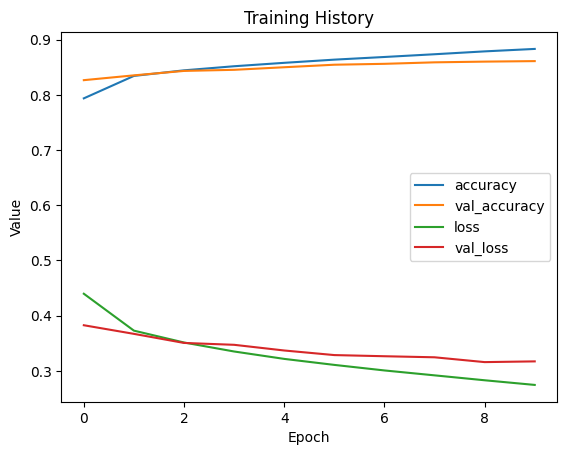

In [19]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Training History')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [20]:
test_sequences = tokenizer.texts_to_sequences(x_test)
test_sequences_matrix = pad_sequences(test_sequences,maxlen=max_len)

In [21]:
test_sequences_matrix

array([[    0,     0,     0, ...,  3716,  4007,  1197],
       [    0,     0,     0, ...,  1238,     2,  2200],
       [    0,     0,     0, ...,   525,    25,   440],
       ...,
       [    0,     0,     0, ...,   155,   224,   112],
       [    0,     0,     0, ...,     4,  1273,   195],
       [    0,     0,     0, ...,  4003,     2, 15318]], dtype=int32)

In [22]:
# Model evaluation
accr = model.evaluate(test_sequences_matrix,y_test)

4711/4711 ━━━━━━━━━━━━━━━━━━━━ 604s 128ms/step - accuracy: 0.8614 - loss: 0.3121


In [23]:
lstm_prediction = model.predict(test_sequences_matrix)

4711/4711 ━━━━━━━━━━━━━━━━━━━━ 598s 127ms/step


In [32]:
import pickle
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [33]:
# Let's save the mdoel.
model.save("model", save_format='tf')

In [34]:
import keras

In [35]:
load_model=keras.models.load_model("model")
with open('tokenizer.pickle', 'rb') as handle:
    load_tokenizer = pickle.load(handle)

In [43]:
# Let's test our model on custom data.
test = 'i love this movie'

def clean_text(text):
    print(text)
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    print(text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text

test=[clean_text(test)]
print(test)

seq = load_tokenizer.texts_to_sequences(test)
padded = pad_sequences(seq, maxlen=300)
print(seq)

pred = load_model.predict(padded)

print("pred", pred)
if pred<0.5:
    print("no hate")
else:
    print("hate and abusive")


i love this movie
i love this movie
['love movi']
[[124]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
pred [[0.16933899]]
no hate
